In [1]:
import numpy as np
import sys
import os
import argparse
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import scipy.stats
import seaborn as sns

# # latex rendering
# mpl.rcParams['text.usetex'] = True

plt.rcParams['font.size'] = 15.5
plt.rcParams['axes.labelsize'] = 15.5
plt.rcParams['xtick.labelsize'] = 15.5
plt.rcParams['ytick.labelsize'] = 15.5
plt.rcParams['legend.fontsize'] = 15.5

savefig_dir = rf'{os.getcwd()}/figs_15ps'
print(f"savefig_dir: {savefig_dir}")
# /data1/yq87/CRISPS/Na3SbSe4-May62024/SIM_15ps_ALLSS/figs_15ps

savefig_dir: /data1/yq87/CRISPS/Na3SbSe4-May62024/SIM_15ps_ALLSS/figs_15ps


In [2]:
# gamma = 0
# epsLF = '1e-5'
# NrLF = 606
# NrHF = 178
# nSamples = 1000

gamma_Lst = ['1e-5', '0']
label_Lst = [r'$1e^{-5}$', r'$0$']
epsLF = '1e-5'
NrLF_Lst = [622, 606] 
NrHF_Lst = [361, 178]
nSamples = 1000

In [3]:
# dir
robSamples_before_GS_Lst = []
robSamples_GS_Lst = []

for gamma, NrLF, NrHF in zip(gamma_Lst, NrLF_Lst, NrHF_Lst):
    print(f'gamma = {gamma}, NrLF = {NrLF}, NrHF = {NrHF} ...')
    RandDir = rf'{os.getcwd()}/Rand15ps_eps1e-6/gamma_{gamma}/localization/data_LFeps{epsLF}_NrLF{NrLF}_NrHF{NrHF}/multi-potential-{nSamples}/'
    robSamples_before_GS = np.load(RandDir + 'robSamples_before_GS.npy')
    robSamples_GS = np.load(RandDir + 'robSamples.npy')
    print(robSamples_before_GS.shape)
    print(robSamples_GS.shape)
    robSamples_before_GS_Lst.append(robSamples_before_GS)
    robSamples_GS_Lst.append(robSamples_GS)

gamma = 1e-5, NrLF = 622, NrHF = 361 ...
(1000, 3048, 983)
(1000, 3048, 983)
gamma = 0, NrLF = 606, NrHF = 178 ...
(1000, 3048, 784)
(1000, 3048, 784)


In [4]:
# get Frobenius norm of the difference between the two sets of samples
frobnorm_diff_Lst = []

for robSamples_before_GS, robSamples_GS in zip(robSamples_before_GS_Lst, robSamples_GS_Lst):
    diff_nSamples = robSamples_before_GS - robSamples_GS # shape: (nSamples, dim1, dim2)
    # get frobenius norm of the difference
    frobnorm_diff = np.linalg.norm(diff_nSamples, axis=(1, 2))
    # normalize it
    frobnorm_diff = frobnorm_diff / np.linalg.norm(robSamples_GS, axis=(1, 2))
    print(frobnorm_diff.shape)
    frobnorm_diff_Lst.append(frobnorm_diff)

(1000,)
(1000,)


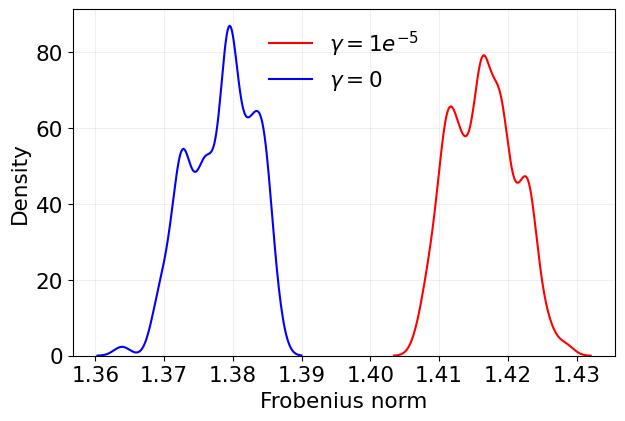

In [5]:
colors = ['red', 'blue']
fig, ax = plt.subplots(figsize=(7, 4.5))
# for gamma, frobnorm_diff in zip(gamma_Lst, frobnorm_diff_Lst):
for id, (gamma, frobnorm_diff) in enumerate(zip(gamma_Lst, frobnorm_diff_Lst)):

    sns.kdeplot(frobnorm_diff, ax=ax, label=rf'$\gamma=${label_Lst[id]}', color=colors[id])
    ax.set_xlabel('Frobenius norm')
    ax.set_ylabel('Density')
    # grid
    ax.grid(True, alpha=0.2)
    plt.legend(frameon=False)
    # save figure
plt.savefig(savefig_dir + f'/frobnorm_diff_all_gamma.png', dpi=300, bbox_inches='tight')


In [6]:
# also compute different in ortohogonality
orth_diff_Lst = []
for i in range(len(gamma_Lst)):
    robSamples_before_GS = robSamples_before_GS_Lst[i]
    robSamples_GS = robSamples_GS_Lst[i]
    orth_diff = np.zeros(nSamples)
    for j in range(nSamples):
        orth_diff[j] = np.linalg.norm(robSamples_before_GS[j].T @ robSamples_before_GS[j] - np.eye(robSamples_before_GS[j].shape[1]))
        # normalize it
        orth_diff[j] = orth_diff[j] / np.linalg.norm(np.eye(robSamples_before_GS[j].shape[1]))
    orth_diff_Lst.append(orth_diff)

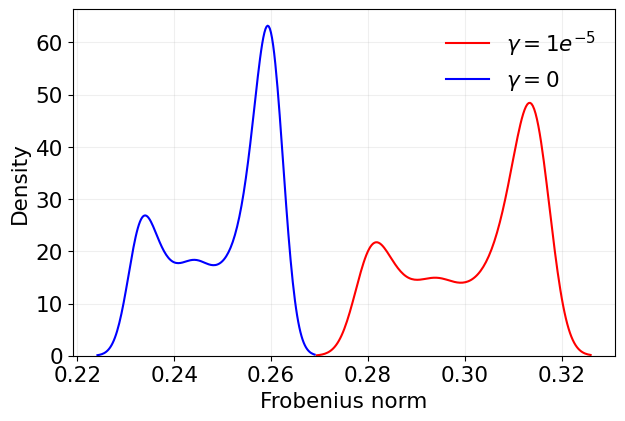

In [7]:
# plot
colors = ['red', 'blue']
fig, ax = plt.subplots(figsize=(7, 4.5))
# for gamma, orth_diff in zip(gamma_Lst, orth_diff_Lst):
for id, (gamma, orth_diff) in enumerate(zip(gamma_Lst, orth_diff_Lst)):
    sns.kdeplot(orth_diff, ax=ax, label=rf'$\gamma=${label_Lst[id]}', color=colors[id])
    ax.set_xlabel('Frobenius norm')
    ax.set_ylabel('Density')
    # grid
    ax.grid(True, alpha=0.2)
    plt.legend(frameon=False)
    # save figure
plt.savefig(savefig_dir + f'/orth_diff_all_gamma.png', dpi=300, bbox_inches='tight')